In [37]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [39]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [41]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

In [43]:
#사이킷런의 변환기
from sklearn.preprocessing import PolynomialFeatures

In [44]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))
#1, 2, 3, 2^2, 2*3, 3^2

[[1. 2. 3. 4. 6. 9.]]


In [45]:
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [46]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [47]:
poly.get_feature_names()#특성이 각각 어떤 입력의 조합으로 만들어졌는지

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [48]:
test_poly = poly.transform(test_input)

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [50]:
print(lr.score(test_poly, test_target))

0.9714559911594155


In [51]:
#특성을 더 많이 추가한다면(3제곱, 4제곱)
poly = PolynomialFeatures(degree=5, include_bias=False)#5제곱까지 특성을 만듦
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [52]:
lr.fit(train_poly,train_target)
print(lr.score(train_poly, train_target))

0.9999999999938143


In [53]:
print(lr.score(test_poly, test_target))#과대적합 모델샘플개수 42개 < 특성 55개

-144.40744532797535


In [54]:
#규제: 모델이 훈련 세트에 과대적합되지 않도록
#훈련 세트의 점수를 낮추고 테스트 세트의 점수를 높임
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [55]:
#릿지 회귀: 계쑤를 제곱한 값을 기준으로 규제 적용
from sklearn.linear_model import Ridge
ridge= Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [56]:
print(ridge.score(test_scaled,test_target))

0.9790693977615386


In [57]:
#적절한 alpha 값(규제의 양 조절)을 찾기
#훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha값

import matplotlib.pyplot as plt
train_score = []
test_score = []

In [58]:
alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    #릿지모델을 만듦
    ridge = Ridge(alpha = alpha)
    #릿지모델을 훈련함
    ridge.fit(train_scaled, train_target)
    #훈련 점수와 테스트 점수를 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
    

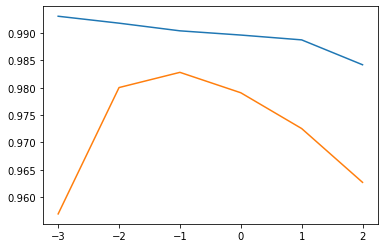

In [59]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.show()
#파란색이 훈련 세트 그래프
#주황색이 테스트 세트 그래프
#두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 -1이 가장 적합

In [60]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled,test_target))

0.9903815817570368
0.9827976465386896


In [61]:
#라쏘 회귀
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [62]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


In [63]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)#반복횟수 늘림
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792032, tolerance: 518.2793833333334
  positive)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345401393, tolerance: 518.2793833333334
  positive)


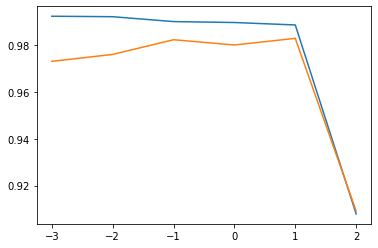

In [64]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.show()
#최적의 alpha값은 1(10)

In [66]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [67]:
#라쏘 계수 값이 0인 것 개수
print(np.sum(lasso.coef_ == 0))

40
